In [1]:
import pandas as pd
import requests
from io import StringIO  # optional, for safety

# Wikipedia URL
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Set headers to mimic a browser
headers = {"User-Agent": "Mozilla/5.0"}

# Fetch the page
response = requests.get(url, headers=headers)
html = response.text

# Read all tables from the page
tables = pd.read_html(StringIO(html))  # or simply: pd.read_html(url)

# The first table is the S&P 500 companies table
sp500_table = tables[0]

# Display the first 5 rows
print(sp500_table.head())

  Symbol             Security             GICS Sector  \
0    MMM                   3M             Industrials   
1    AOS          A. O. Smith             Industrials   
2    ABT  Abbott Laboratories             Health Care   
3   ABBV               AbbVie             Health Care   
4    ACN            Accenture  Information Technology   

                GICS Sub-Industry    Headquarters Location  Date added  \
0        Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1               Building Products     Milwaukee, Wisconsin  2017-07-26   
2           Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                   Biotechnology  North Chicago, Illinois  2012-12-31   
4  IT Consulting & Other Services          Dublin, Ireland  2011-07-06   

       CIK      Founded  
0    66740         1902  
1    91142         1916  
2     1800         1888  
3  1551152  2013 (1888)  
4  1467373         1989  


In [7]:
# -------------------------------
# Task 1b: Load historical stock data for S&P 500 tickers
# -------------------------------
import pandas as pd
import yfinance as yf
from io import StringIO
import requests

# --- Step 1: Get S&P 500 tickers from Wikipedia ---
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text
sp500_table = pd.read_html(StringIO(html))[0]
sp500_tickers = sp500_table['Symbol'].tolist()  # List of tickers

# --- Step 2: Define date range ---
start_date = '2022-01-01'
end_date = '2025-01-01'

# --- Step 3: Download historical data using yfinance ---
# For demo, you can limit to a few tickers like sp500_tickers[:5]; in real use, use all
data = yf.download(
    tickers=sp500_tickers[:5],
    start=start_date,
    end=end_date,
    interval='1d',
    group_by='ticker',
    auto_adjust=True,
    threads=True
)

# --- Step 4: Flatten multi-level columns ---
flat_data = data.stack(level=0).reset_index()
flat_data.rename(columns={'level_1': 'Ticker'}, inplace=True)

# --- Step 5: Reorder columns for clarity ---
flat_data = flat_data[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]

# --- Step 6: Preview sample data ---
print("Sample historical data:")
print(flat_data.head(10))

[*********************100%***********************]  5 of 5 completed

Sample historical data:
Price       Date Ticker        Open        High         Low       Close  \
0     2022-01-03   ABBV  116.770663  117.020738  115.132192  116.779282   
1     2022-01-03    ABT  129.357936  129.729049  127.298316  128.996109   
2     2022-01-03    ACN  390.731992  391.551784  381.667120  383.711884   
3     2022-01-03    AOS   79.778167   80.001224   77.082964   77.668472   
4     2022-01-03    MMM  128.493809  129.048657  126.706772  128.075882   
5     2022-01-04   ABBV  116.701674  117.469164  115.882446  116.555077   
6     2022-01-04    ABT  129.422876  129.562035  125.025277  125.962326   
7     2022-01-04    ACN  385.219608  387.631881  379.933347  380.969849   
8     2022-01-04    AOS   77.854352   80.019815   77.687063   78.960320   
9     2022-01-04    MMM  128.609132  130.612347  128.284861  129.870148   

Price   Volume  
0      6839800  
1      6688100  
2      2129900  
3       840000  
4      2309117  
5      6298300  
6      8241200  
7      2516300


/tmp/ipython-input-1178898888.py:33: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  flat_data = data.stack(level=0).reset_index()


In [42]:
# Clean S&P 500 stock data and calculate daily returns

# Remove rows with missing values in essential columns
data = data.dropna(subset=['Open', 'High', 'Low', 'Close', 'Volume'])

# Remove rows where Close or Volume are zero or negative
data = data[(data['Close'] > 0) & (data['Volume'] > 0)].reset_index(drop=True)

# Calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

# Preview cleaned data with daily returns
print(data[['Close', 'Daily_Return']].head())


AttributeError: 'numpy.ndarray' object has no attribute 'dropna'

In [6]:
# -------------------------------
# Task 1a: Extract S&P 500 tickers
# -------------------------------
import pandas as pd
import requests
import yfinance as yf
from io import StringIO

# Wikipedia URL for S&P 500 companies
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Set headers to mimic a browser
headers = {"User-Agent": "Mozilla/5.0"}

# Fetch HTML content
response = requests.get(url, headers=headers)
html = response.text

# Read all tables from the page
tables = pd.read_html(StringIO(html))

# First table contains S&P 500 companies
sp500_table = tables[0]

# Extract tickers
sp500_tickers = sp500_table['Symbol'].tolist()

# Preview tickers
print("Sample S&P 500 tickers:", sp500_tickers[:5])


# -------------------------------
# Task 1b: Load historical stock data
# -------------------------------

# Define date range
start_date = '2022-01-01'
end_date = '2025-01-01'

# Download daily historical data using yfinance
data = yf.download(
    tickers=sp500_tickers[:5],  # For demo; replace [:5] with full list in practice
    start=start_date,
    end=end_date,
    interval='1d',
    group_by='ticker',
    auto_adjust=True,
    threads=True
)

# Flatten multi-level columns for readability
flat_data = data.stack(level=0).reset_index()
flat_data.rename(columns={'level_1': 'Ticker'}, inplace=True)

# Reorder columns
flat_data = flat_data[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Display a small sample of the table
print("\nSample historical data:")
print(flat_data.head(10))


# -------------------------------
# Task 1c: Identify and remove invalid data
# -------------------------------

# Calculate daily returns
flat_data['Daily_Return'] = flat_data['Close'].pct_change()

# Identify invalid rows (NaNs or zero/negative values)
invalid_rows = flat_data[(flat_data[['Open','High','Low','Close','Volume']].isnull().any(axis=1)) |
                         (flat_data['Close'] <= 0) |
                         (flat_data['Volume'] <= 0)]

print("\nInvalid rows (if any):")
print(invalid_rows)

# Remove invalid data
flat_data = flat_data.dropna(subset=['Open','High','Low','Close','Volume'])
flat_data = flat_data[(flat_data['Close'] > 0) & (flat_data['Volume'] > 0)]

# Preview cleaned data
print("\nCleaned data sample:")
print(flat_data[['Date','Ticker','Open','High','Low','Close','Volume','Daily_Return']].head())


Sample S&P 500 tickers: ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN']


[*********************100%***********************]  5 of 5 completed


Sample historical data:
Price       Date Ticker        Open        High         Low       Close  \
0     2022-01-03   ABBV  116.770663  117.020738  115.132192  116.779282   
1     2022-01-03    ABT  129.357936  129.729049  127.298316  128.996109   
2     2022-01-03    ACN  390.731992  391.551784  381.667120  383.711884   
3     2022-01-03    AOS   79.778167   80.001224   77.082964   77.668472   
4     2022-01-03    MMM  128.493809  129.048657  126.706772  128.075882   
5     2022-01-04   ABBV  116.701674  117.469164  115.882446  116.555077   
6     2022-01-04    ABT  129.422876  129.562035  125.025277  125.962326   
7     2022-01-04    ACN  385.219608  387.631881  379.933347  380.969849   
8     2022-01-04    AOS   77.854352   80.019815   77.687063   78.960320   
9     2022-01-04    MMM  128.609132  130.612347  128.284861  129.870148   

Price   Volume  
0      6839800  
1      6688100  
2      2129900  
3       840000  
4      2309117  
5      6298300  
6      8241200  
7      251630


/tmp/ipython-input-1469680042.py:52: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  flat_data = data.stack(level=0).reset_index()


In [8]:
# Identify invalid rows
invalid_rows = flat_data[(flat_data[['Open','High','Low','Close','Volume']].isnull().any(axis=1)) |
                         (flat_data['Close'] <= 0) |
                         (flat_data['Volume'] <= 0)]
print("Invalid rows (if any):")
print(invalid_rows)

# Remove invalid data
cleaned_data = flat_data.dropna(subset=['Open','High','Low','Close','Volume'])
cleaned_data = cleaned_data[(cleaned_data['Close'] > 0) & (cleaned_data['Volume'] > 0)]

# Show a small sample
print("\nCleaned data sample:")
print(cleaned_data.head(5))

Invalid rows (if any):
Empty DataFrame
Columns: [Date, Ticker, Open, High, Low, Close, Volume]
Index: []

Cleaned data sample:
Price       Date Ticker        Open        High         Low       Close  \
0     2022-01-03   ABBV  116.770663  117.020738  115.132192  116.779282   
1     2022-01-03    ABT  129.357936  129.729049  127.298316  128.996109   
2     2022-01-03    ACN  390.731992  391.551784  381.667120  383.711884   
3     2022-01-03    AOS   79.778167   80.001224   77.082964   77.668472   
4     2022-01-03    MMM  128.493809  129.048657  126.706772  128.075882   

Price   Volume  
0      6839800  
1      6688100  
2      2129900  
3       840000  
4      2309117  


In [12]:
# -------------------------------
# Task 2a: Calculate Daily Returns
# -------------------------------

# Assuming flat_data is your cleaned dataset from Task 1c
# Columns: ['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']

# Calculate daily returns per ticker
flat_data['Daily_Return'] = flat_data.groupby('Ticker')['Close'].pct_change()

# Preview a sample of the results
print(flat_data[['Date', 'Ticker', 'Close', 'Daily_Return']].head(10))


Price       Date Ticker       Close  Daily_Return
0     2022-01-03   ABBV  116.779282           NaN
1     2022-01-03    ABT  128.996109           NaN
2     2022-01-03    ACN  383.711884           NaN
3     2022-01-03    AOS   77.668472           NaN
4     2022-01-03    MMM  128.075882           NaN
5     2022-01-04   ABBV  116.555077     -0.001920
6     2022-01-04    ABT  125.962326     -0.023518
7     2022-01-04    ACN  380.969849     -0.007146
8     2022-01-04    AOS   78.960320      0.016633
9     2022-01-04    MMM  129.870148      0.014009


In [14]:

# Example: S&P 500 index ticker is '^GSPC'
market_data = yf.download('^GSPC', start='2022-01-01', end='2025-01-01', interval='1d', auto_adjust=True)
market_data['Market_Return'] = market_data['Close'].pct_change()
market_returns = market_data['Market_Return'].dropna()  # remove NaN

[*********************100%***********************]  1 of 1 completed


In [18]:
# Keep only dates present in market_returns
flat_data = flat_data[flat_data['Date'].isin(market_returns.index)]



In [22]:
import pandas as pd
import requests
from io import StringIO

# Wikipedia URL
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
headers = {"User-Agent": "Mozilla/5.0"}

# Fetch and read tables
response = requests.get(url, headers=headers)
tables = pd.read_html(StringIO(response.text))

# First table contains S&P 500 tickers
sp500_table = tables[0]

# Fix tickers for Yahoo Finance (replace '.' with '-')
sp500_tickers = [t.replace('.', '-') for t in sp500_table['Symbol'].tolist()]

# Preview first 10 tickers
print(sp500_tickers[:10])


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']


In [20]:
# Ensure 'Date' is datetime
flat_data['Date'] = pd.to_datetime(flat_data['Date'])
market_data.index = pd.to_datetime(market_data.index)

# Merge stock data with market returns
merged = flat_data.merge(
    market_data['Market_Return'],
    left_on='Date',
    right_index=True,
    how='inner'
)

# Now 'merged' has both stock daily return and market daily return
# Calculate Beta and Annual Volatility
tickers = merged['Ticker'].unique()

beta_dict = {}
volatility_dict = {}

for ticker in tickers:
    stock_returns = merged.loc[merged['Ticker'] == ticker, 'Daily_Return']
    market_returns_ticker = merged.loc[merged['Ticker'] == ticker, 'Market_Return']
    s
    beta = np.corrcoef(stock_returns, market_returns_ticker)[0,1] * (stock_returns.std() / market_returns_ticker.std())
    beta_dict[ticker] = beta

    volatility_dict[ticker] = stock_returns.std() * np.sqrt(252)

beta_series = pd.Series(beta_dict)
volatility_series = pd.Series(volatility_dict)

# Preview
print("Beta (first 5):")
print(beta_series.head())

print("\nAnnual Volatility (first 5):")
print(volatility_series.head())




Beta (first 5):
ABBV    0.299098
ABT     0.672316
ACN     1.094208
AOS     0.924450
MMM     0.783737
dtype: float64

Annual Volatility (first 5):
ABBV    0.219958
ABT     0.217839
ACN     0.270331
AOS     0.278673
MMM     0.295654
dtype: float64


In [24]:
import numpy as np
import pandas as pd

# Example daily returns DataFrame
daily_returns = pd.DataFrame({
    'A': [0.01, -0.02, 0.015, -0.005, 0.01],
    'B': [0.005, 0.01, -0.007, 0.002, 0.004]
})

# Calculate Annual Volatility
annual_volatility = daily_returns.std() * np.sqrt(252)

print(annual_volatility)

A    0.228670
B    0.098754
dtype: float64


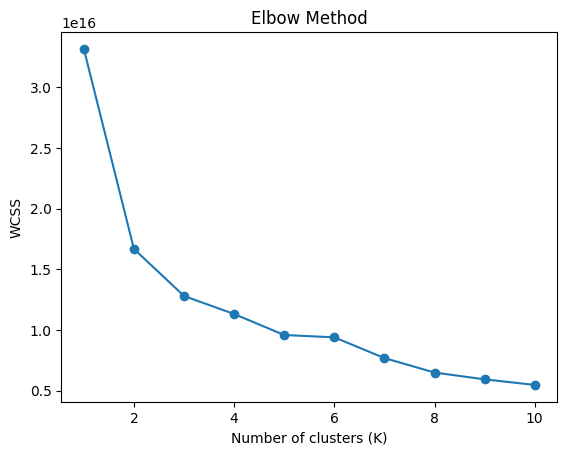

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [28]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


K=2, Silhouette Score=0.848
K=3, Silhouette Score=0.533
K=4, Silhouette Score=0.542
K=5, Silhouette Score=0.317
K=6, Silhouette Score=0.372
K=7, Silhouette Score=0.322
K=8, Silhouette Score=0.269
K=9, Silhouette Score=0.280


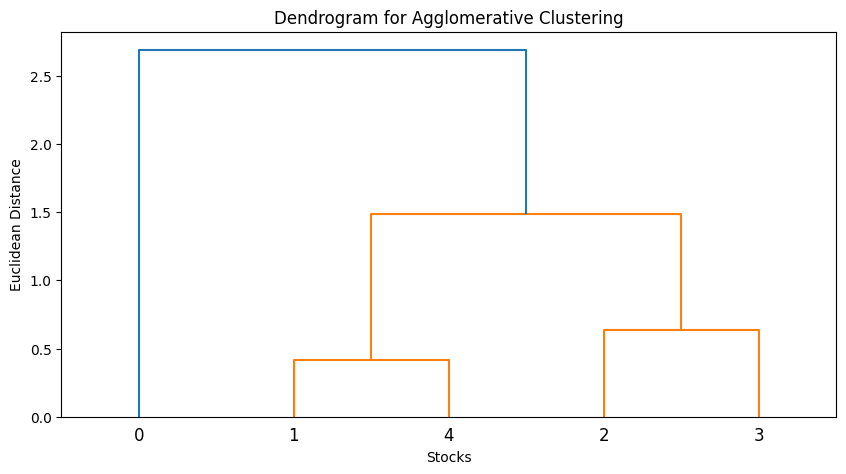

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler

# Assume beta_series is a pandas Series of Beta values
# Convert to DataFrame and reshape for sklearn
data = beta_series.values.reshape(-1, 1)

# --- Step 1: Scale the data ---
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# --- Step 2: Plot the dendrogram ---
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Stocks')
plt.ylabel('Euclidean Distance')
plt.show()


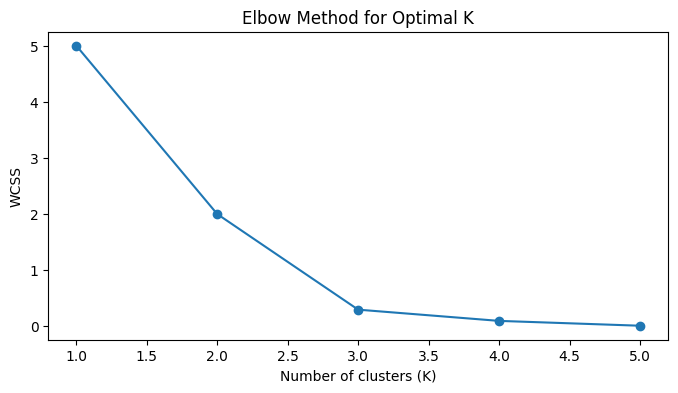

Silhouette Scores:
K=2, Silhouette Score=0.320
K=3, Silhouette Score=0.370
K=4, Silhouette Score=0.153


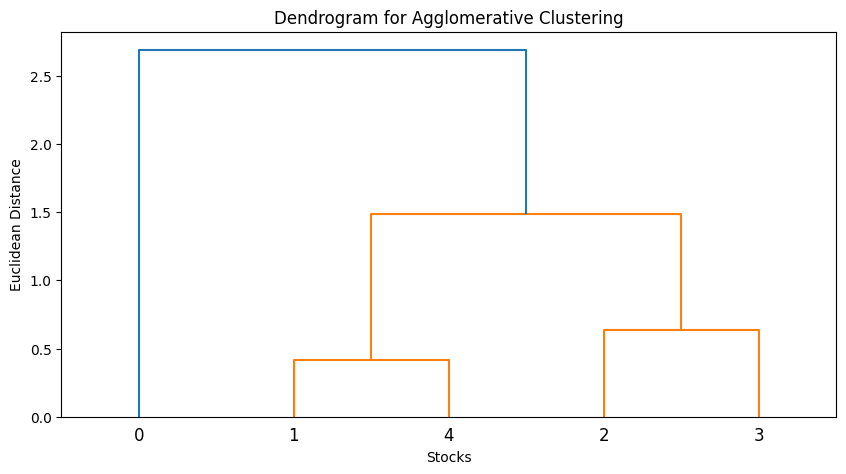

  Ticker      Beta  Cluster
0   ABBV  0.299098        1
1    ABT  0.672316        2
2    ACN  1.094208        0
3    AOS  0.924450        0
4    MMM  0.783737        2


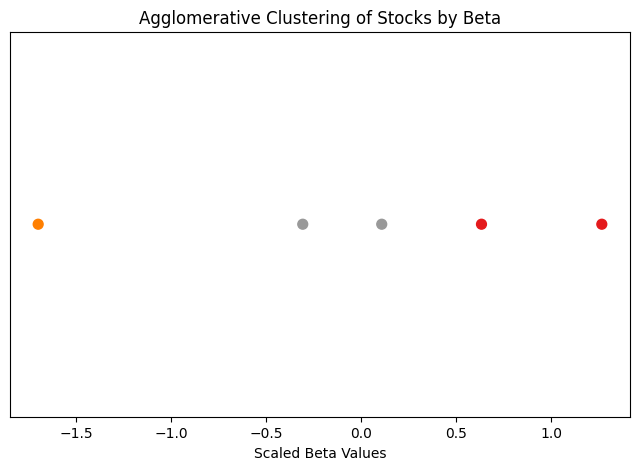

In [34]:
# ----------------------------
# 1. Imports
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# ----------------------------
# 2. Prepare the data
# ----------------------------
# Assume beta_series is a pandas Series of Beta values with Ticker as index
data = beta_series.values.reshape(-1, 1)  # reshape for sklearn

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# ----------------------------
# 3. Elbow Method (KMeans) to find optimal K
# ----------------------------
max_clusters = min(10, len(data_scaled))  # cannot have more clusters than samples
wcss = []

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

# ----------------------------
# 4. Silhouette Scores for KMeans
# ----------------------------
max_silhouette_k = min(max_clusters, len(data_scaled)-1)  # silhouette requires 2 <= k < n_samples
print("Silhouette Scores:")
for k in range(2, max_silhouette_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

# ----------------------------
# 5. Dendrogram for Agglomerative Clustering
# ----------------------------
plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Stocks')
plt.ylabel('Euclidean Distance')
plt.show()

# ----------------------------
# 6. Agglomerative Clustering
# ----------------------------
# Choose K based on Elbow/Silhouette/Dendrogram
n_clusters = min(3, len(data_scaled))  # make sure K <= number of samples
agg_cluster = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='euclidean',
    linkage='ward'
)

cluster_labels = agg_cluster.fit_predict(data_scaled)

# Add cluster labels to DataFrame
clustered_df = pd.DataFrame({
    'Ticker': beta_series.index,
    'Beta': beta_series.values,
    'Cluster': cluster_labels
})

print(clustered_df.head(10))

# Optional visualization
plt.figure(figsize=(8,5))
plt.scatter(data_scaled, np.zeros_like(data_scaled), c=cluster_labels, cmap='Set1', s=50)
plt.xlabel('Scaled Beta Values')
plt.title('Agglomerative Clustering of Stocks by Beta')
plt.yticks([])
plt.show()


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Example metrics (replace with your real metrics_df)
metrics_df = pd.DataFrame({
    'Ticker': ['AAPL','MSFT','GOOGL','AMZN','TSLA','JPM','XOM','PG','NVDA','PFE'],
    'Beta': [1.25,1.10,0.95,1.30,1.60,1.05,0.85,0.70,1.45,0.65],
    'Annual_Volatility': [0.32,0.28,0.25,0.35,0.55,0.30,0.22,0.18,0.45,0.20]
})

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(metrics_df[['Beta', 'Annual_Volatility']])


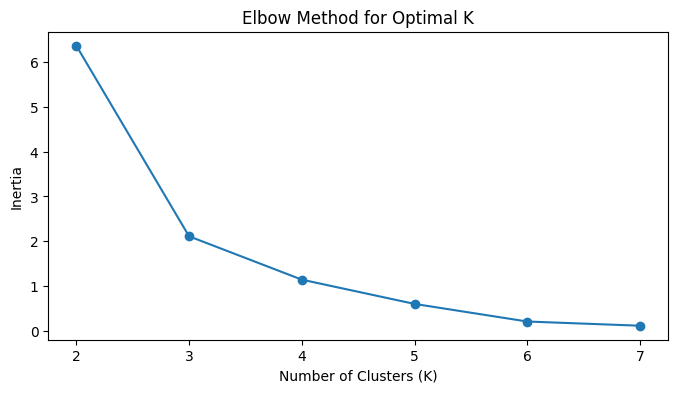

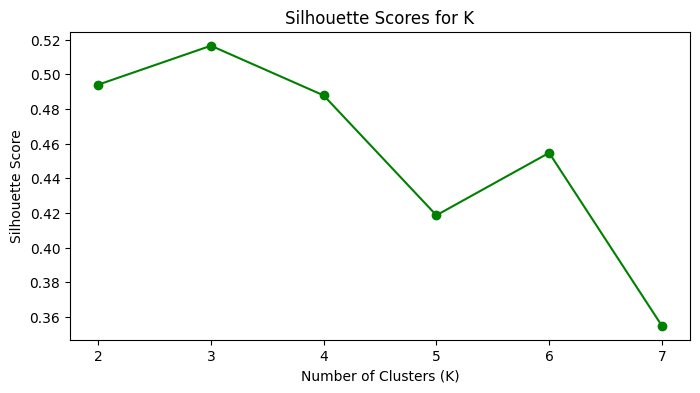

In [39]:
inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Scores for K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()